In [24]:
import pandas as pd
import json
import numpy as np
import collections
import csv

In [2]:
df = pd.read_csv('../data/emotion_lexicons/nrc/NRC_dutch.csv')
df.drop_duplicates(subset=['Dutch (nl)'], keep='first', inplace=True)

In [3]:
conditions = [
    (df['Positive'] == 0) & (df['Negative'] == 0),
    (df['Positive'] == 1) & (df['Negative'] == 0),
    (df['Positive'] == 0) & (df['Negative'] == 1)]

choices = [0, 1, -1]
df['valence'] = np.select(conditions, choices)


In [84]:
with open('../data/prepared_data/spie009urug01_01.json', 'r') as j:
     contents = json.loads(j.read())

In [85]:
def sentence_polarity(sentence, normalize=True):
    valence = 0
    for word in sentence:
        try:
            val_score = df[df['Dutch (nl)'] == word]['valence'].values[0]
            valence += val_score
        except:
            pass
    if normalize:
        return valence / len(sentence)
    else:
        return valence

In [86]:
d = {}

for index, chapter in enumerate(contents):
    valence_chapter = []
    for sentence in chapter:
        valence_chapter.append(sentence_polarity(sentence, normalize=True))
    print(valence_chapter)
    d[index] = valence_chapter

            


In [87]:
import matplotlib.pyplot as plt


In [90]:
d

{0: [0.02857142857142857,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.09090909090909091,
  0.058823529411764705,
  0.5,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.07142857142857142,
  0.0,
  0.038461538461538464,
  0.0,
  -0.06666666666666667,
  -0.07692307692307693,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.015873015873015872,
  0.0,
  -0.07142857142857142,
  0.14814814814814814,
  0.0,
  0.0,
  -0.03125,
  -0.09375,
  0.037037037037037035,
  -0.07142857142857142,
  0.0,
  -0.045454545454545456,
  0.2,
  0.03225806451612903,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.125,
  0.0,
  0.0,
  0.07692307692307693,
  0.0,
  0.0,
  0.0,
  0.0,
  0.1111111111111111,
  0.08,
  0.058823529411764705,
  0.0,
  0.0,
  0.0,
  -0.1111111111111111,
  0.0,
  0.0,
  0.014705882352941176,
  0.0,
  0.0,
  0.05263157894736842,
  -0.041666666666666664,
  0.0,
  0.0,
  0.0,
  0.0,
  0.058823529411764705,
  0.0,
  0.0,
  0.1111111111111111,
  0.2857142857142857,
  0.5,
  0.0,
  0

In [88]:
time_series = sum(d.values(), [])

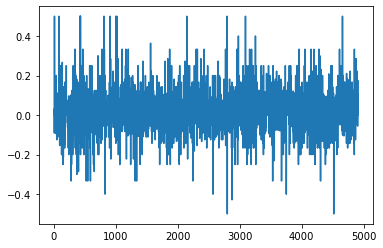

In [89]:
plt.plot(time_series)

In [78]:
pd.DataFrame(time_series).T.to_csv('test_norm.csv', header=False)

In [19]:
import saffine.detrending as dm

In [22]:
dm.detrending_method()

AttributeError: module 'saffine.detrending' has no attribute 'detrending_method'

In [41]:
def qdp(ts):
    """ quick and dirty signal plotting for testing
    """
    plt.figure()
    #plt.plot(signal[:1000],'k-')
    plt.plot(ts,'k-')
    plt.xlabel('$t$')
    plt.ylabel('$F(t)$')
    plt.show()
    plt.close()

def integrate_ord1(ts):
    """
    first order integration of time series (list or numpy array) ts
    """
    return np.cumsum(ts) - np.mean(ts)

def normalize(ts, scl01 = False):
    ts01 = (ts - np.min(ts)) / (np.max(ts) - np.min(ts))
    ts11 = 2 * ts01 -1
    if scl01:
        return ts01
    else:
        return ts11

In [42]:
data = integrate_ord1(time_series)

In [44]:
n = len(data);# int for doc
w = int(4 * np.floor(n/20) + 1);# int for doc
# format
X = np.mat([float(x) for x in data])

In [49]:
dm.detrending_method()

AttributeError: module 'saffine.detrending_method' has no attribute 'detrending_method'

In [45]:
plt.figure()
for i in range(1,5):
    noise_ww_1, trend_ww_1 = dm.detrending_method(X, w, i);
    # zero2one
    #trend_ww_1 = (trend_ww_1 - np.min(trend_ww_1))/(np.max(trend_ww_1)-np.min(trend_ww_1))
    #trend_ww_1 = 2 * trend_ww_1 - 1
    #plt.plot(X.T,'r')
    plt.plot(normalize(trend_ww_1).T, label = str(i))#,color[i - 1])

AttributeError: module 'saffine.detrending_method' has no attribute 'detrending_method'

<Figure size 432x288 with 0 Axes>